In [4]:
import pandas as pd
import numpy as np 

import seaborn as sns  
import matplotlib.pyplot as plt 
%matplotlib inline 

import time 
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB 

from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from nltk.tokenize import RegexpTokenizer 
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline 

from PIL import Image 

from bs4 import BeautifulSoup
from selenium import webdriver 
import networkx as nx 
import pickle

import warnings
warnings.filterwarnings('ignore')

In [5]:
phish_data = pd.read_csv('phishing_site_urls.csv')

In [6]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [7]:

phish_data.tail()

,URL,Label
549352,https://amazon.in,good
549353,https://web.whatsapp.com/,good
549354,https://www.instagram.com/,good
549355,https://www.ckthakurcollege.net/,good
549356,https://cimsstudent.mastersofterp.in/,good


In [8]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549357 entries, 0 to 549356
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549357 non-null  object
 1   Label   549357 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [9]:
phish_data.isnull().sum()

URL      0
Label    0
dtype: int64

In [10]:
label_counts = pd.DataFrame(phish_data.Label.value_counts())

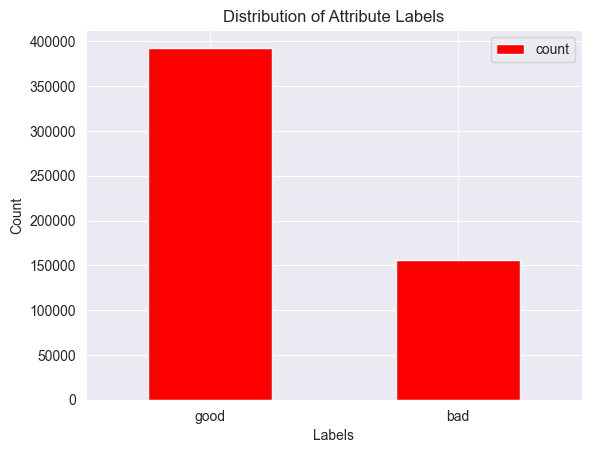

In [11]:
label_counts.plot(kind='bar', color=['red'])  
plt.title('Distribution of Attribute Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.show()

In [12]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [13]:
tokenizer.tokenize(phish_data.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [14]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) 
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 3.713185999979032 sec


In [16]:
phish_data.sample(5)

,URL,Label,text_tokenized
483307,firstcommercialbank.com/index.cfm?ID=447,good,"[firstcommercialbank, com, index, cfm, ID]"
103941,mejapayung.com/Gdoccc/,bad,"[mejapayung, com, Gdoccc]"
92697,www.grandiose.com/poddington/,good,"[www, grandiose, com, poddington]"
546101,amazingsuperstar.info/hunter/,bad,"[amazingsuperstar, info, hunter]"
271154,alexandrebilodeau.ca/,good,"[alexandrebilodeau, ca]"


In [17]:
stemmer = SnowballStemmer("english")

In [18]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 42.01012730001821 sec


In [19]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
437359,sporcle.com/games/kingmob91/mlb-montreal-expos...,good,"[sporcle, com, games, kingmob, mlb, montreal, ...","[sporcl, com, game, kingmob, mlb, montreal, ex..."
433909,songlyrics.com/the-besnard-lakes/albatross-lyr...,good,"[songlyrics, com, the, besnard, lakes, albatro...","[songlyr, com, the, besnard, lake, albatross, ..."
422361,reunion.com/jennifernugent/,good,"[reunion, com, jennifernugent]","[reunion, com, jennifernug]"
385538,masslive.com/news/index.ssf/2011/10/grand_jury...,good,"[masslive, com, news, index, ssf, grand, jury,...","[massliv, com, news, index, ssf, grand, juri, ..."
285825,aurorasentinel.com/sports/prep_sports/football...,good,"[aurorasentinel, com, sports, prep, sports, fo...","[aurorasentinel, com, sport, prep, sport, foot..."


In [20]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.3031316999986302 sec


In [21]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
360982,imperial-consultants.co.uk/,good,"[imperial, consultants, co, uk]","[imperi, consult, co, uk]",imperi consult co uk
205535,kirkwoodbuilders.com/,good,"[kirkwoodbuilders, com]","[kirkwoodbuild, com]",kirkwoodbuild com
386837,mediatakeout.com/2009/35969-trailer_trash_woma...,good,"[mediatakeout, com, trailer, trash, woman, pho...","[mediatakeout, com, trailer, trash, woman, pho...",mediatakeout com trailer trash woman photod sm...
250798,tweetmeme.com/story/217384569/top5musiqueplusc...,good,"[tweetmeme, com, story, top, musiquepluscom, m...","[tweetmem, com, stori, top, musiquepluscom, mu...",tweetmem com stori top musiquepluscom musiqueplus
398266,myspace.com/26895363,good,"[myspace, com]","[myspac, com]",myspac com


In [22]:
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [23]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [24]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [58]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green','verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [26]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

In [29]:
import wordcloud
from wordcloud import STOPWORDS
from wordcloud import WordCloud

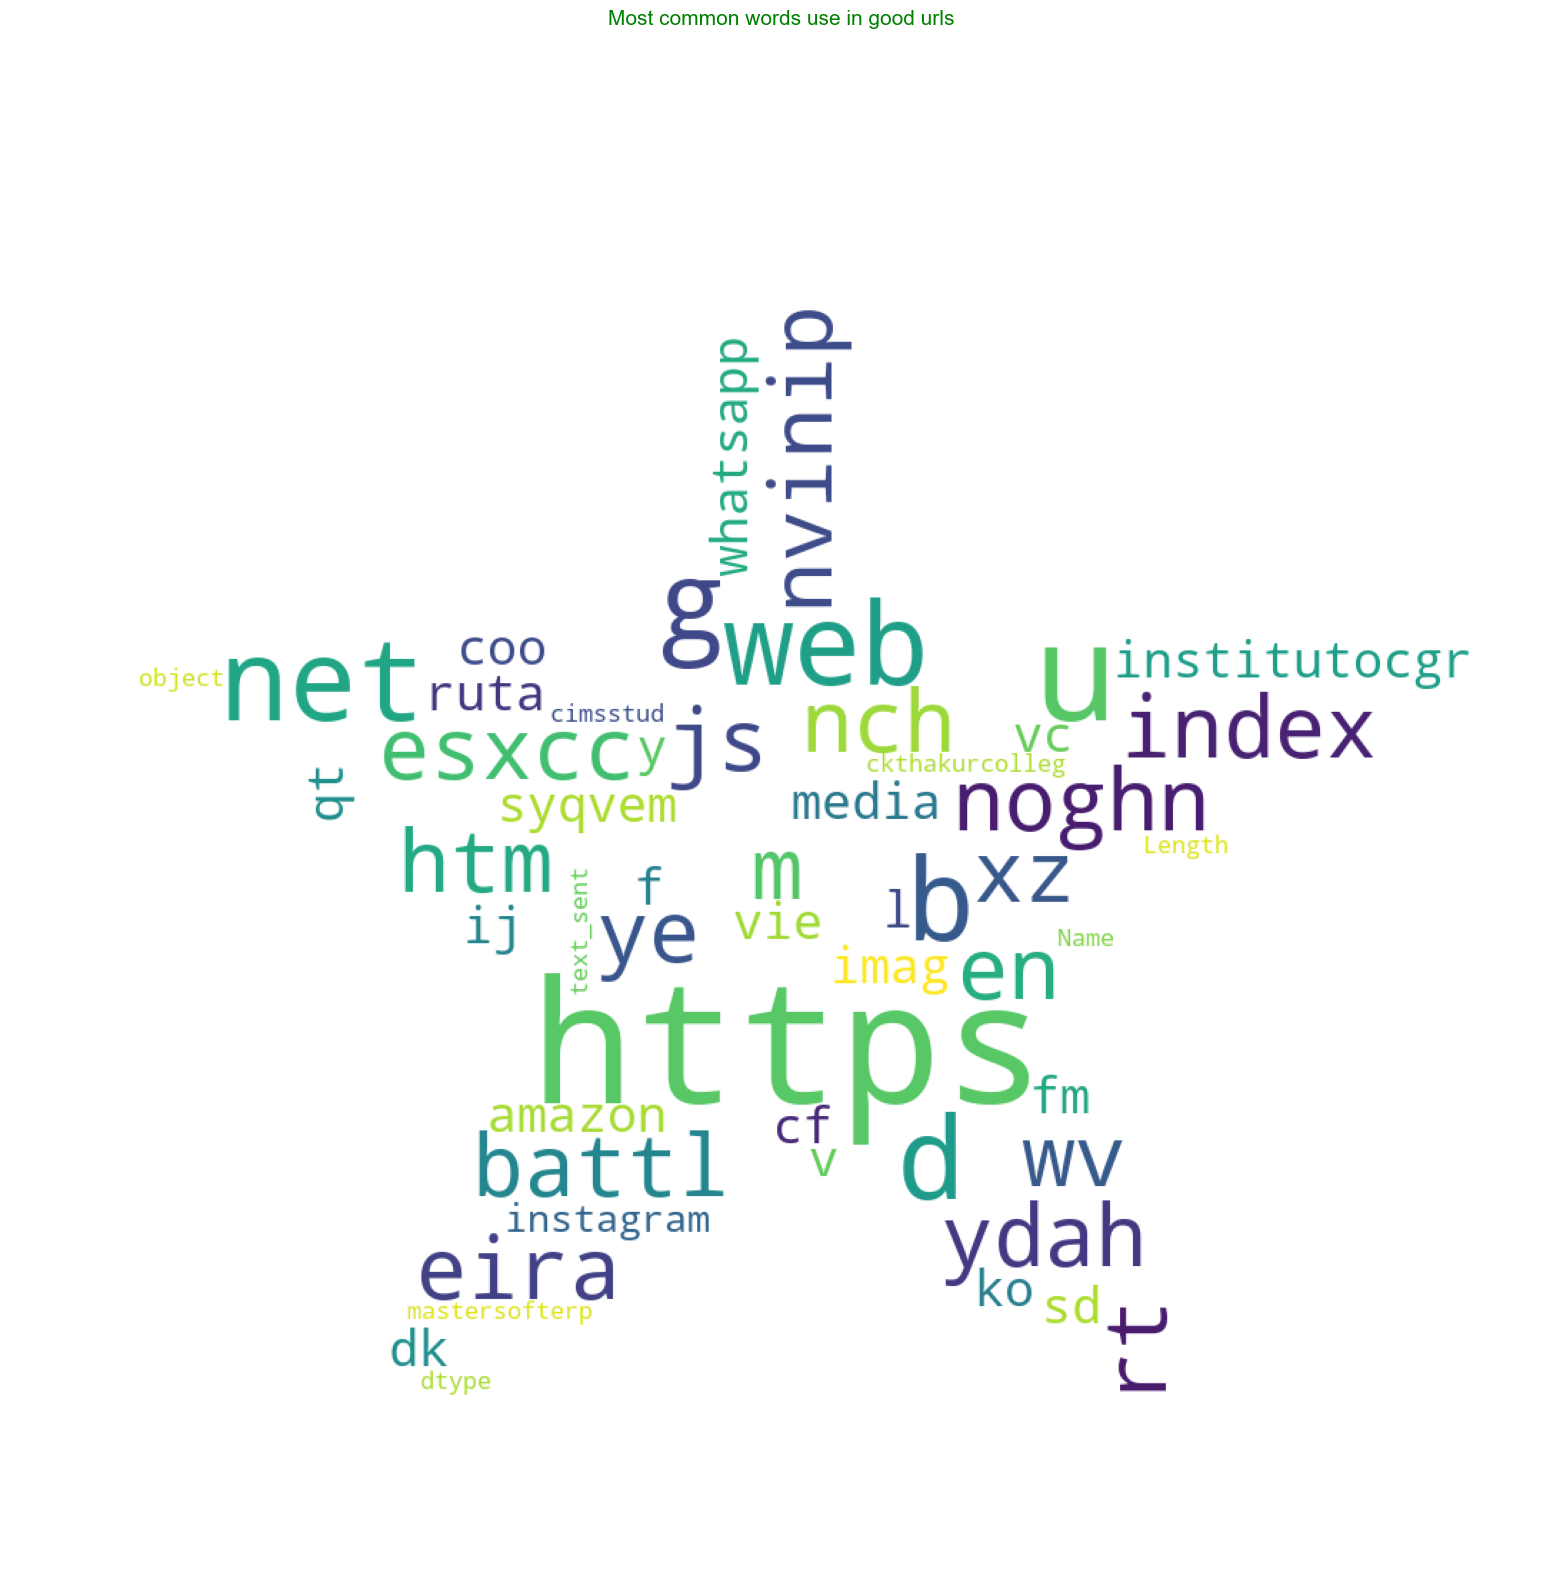

In [30]:
common_text = str(data)
common_mask = np.array(Image.open('star.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in good urls', title_size=15)

In [31]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

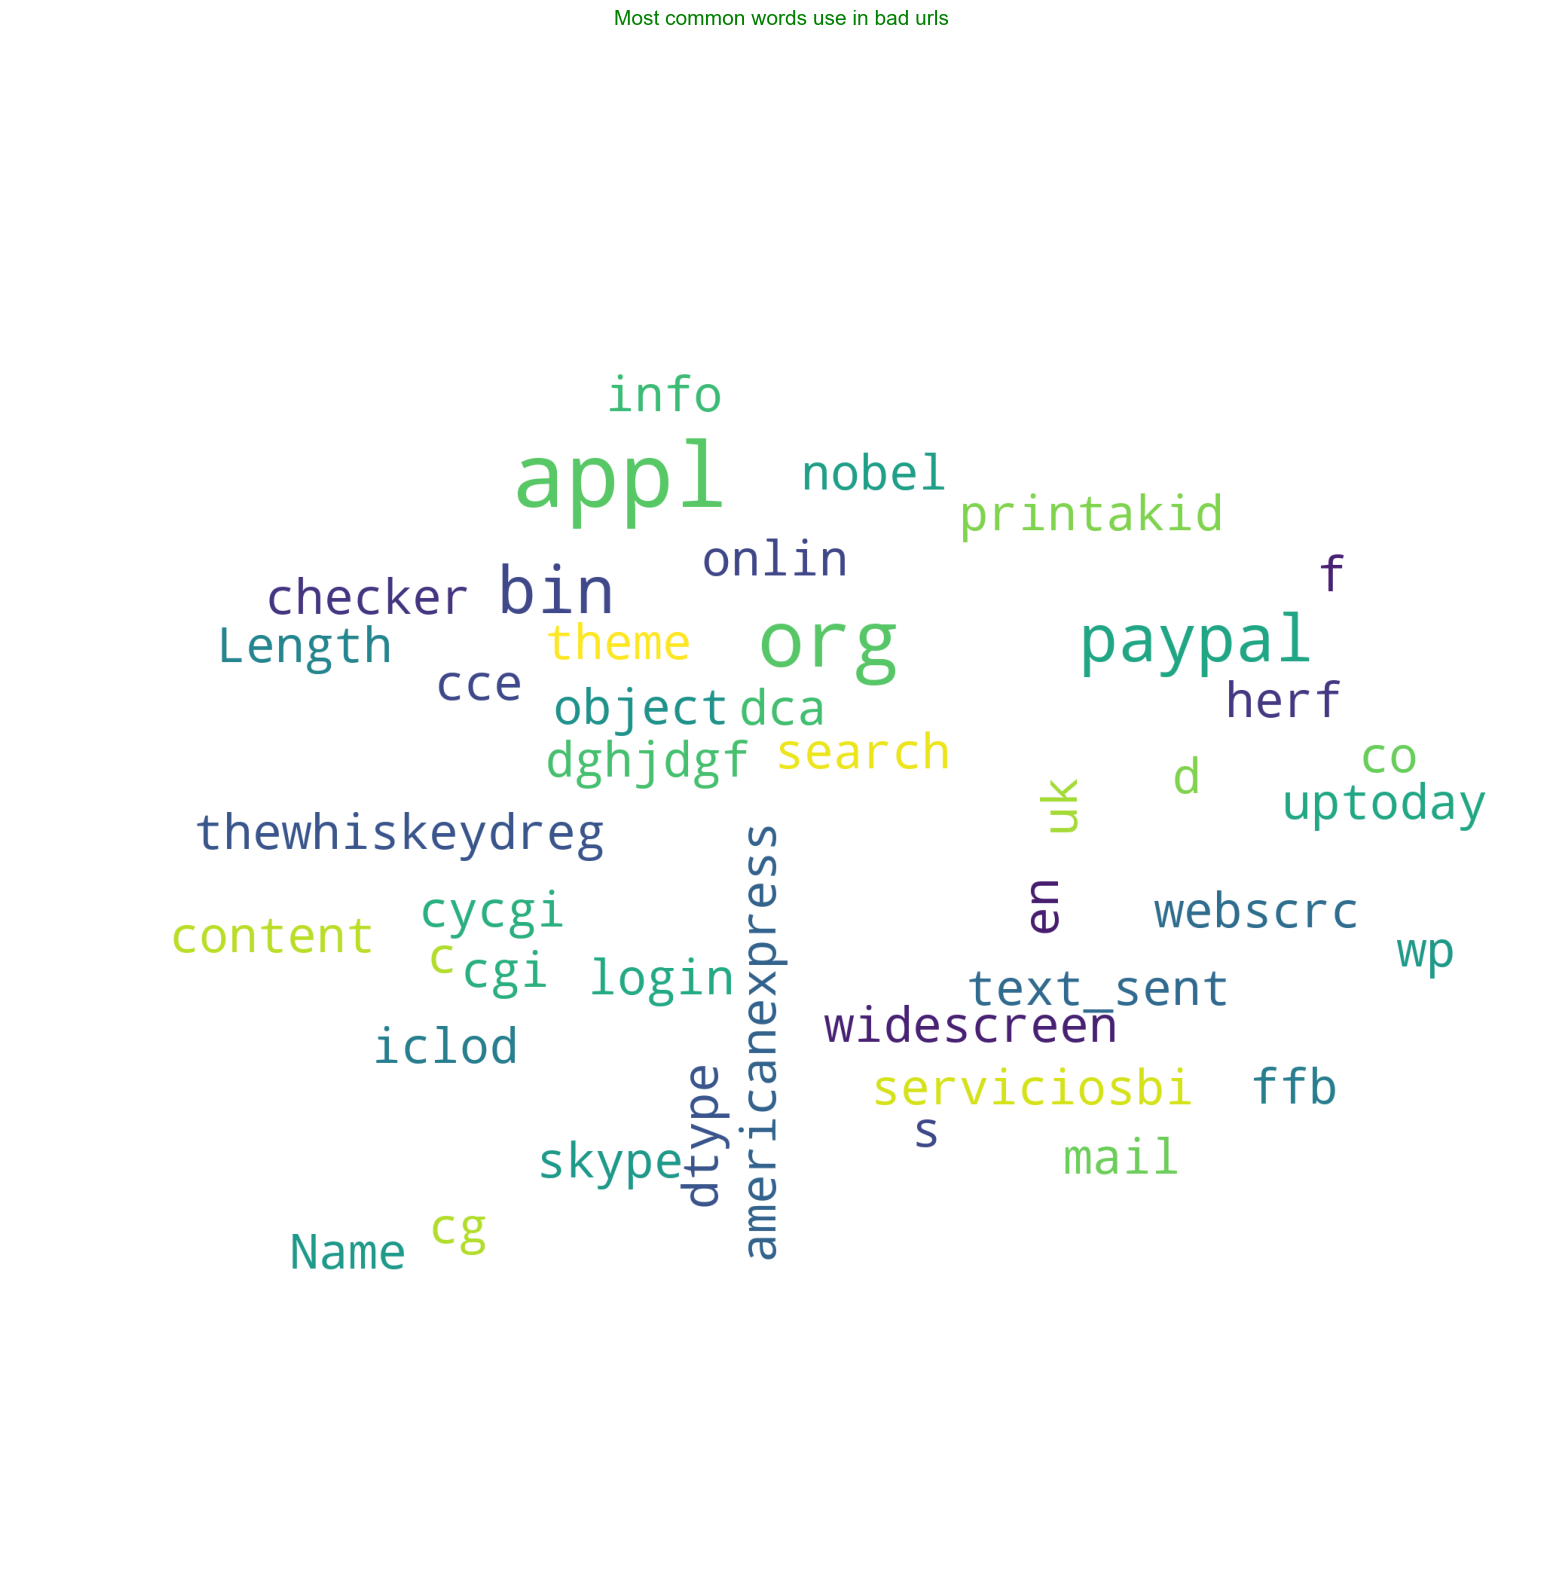

In [32]:
common_text = str(data)
common_mask = np.array(Image.open('comment.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in bad urls', title_size=15)

In [33]:
cv = CountVectorizer()

In [34]:
feature = cv.fit_transform(phish_data.text_sent)

In [35]:
feature[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5, 350858))

In [36]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

In [37]:
lr = LogisticRegression()

In [38]:
lr.fit(trainX,trainY)

LogisticRegression()

In [39]:
lr.score(testX,testY)

0.9638488422892093

In [40]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9775130637813488
Testing Accuracy : 0.9638488422892093

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.96      0.93     36491
        Good       0.99      0.96      0.98    100849

    accuracy                           0.96    137340
   macro avg       0.95      0.96      0.95    137340
weighted avg       0.97      0.96      0.96    137340


CONFUSION MATRIX


<Axes: >

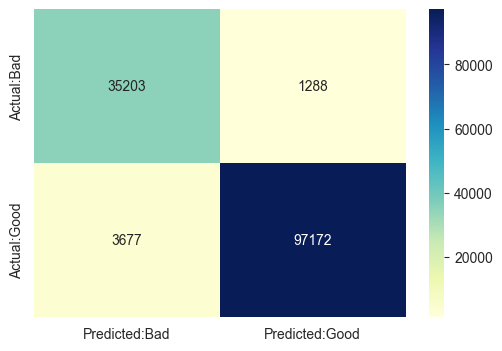

In [41]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [42]:
mnb = MultinomialNB()

In [43]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [44]:
mnb.score(testX,testY)

0.9586282219309742

In [45]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9738603018807477
Testing Accuracy : 0.9586282219309742

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.94      0.93     38088
        Good       0.98      0.97      0.97     99252

    accuracy                           0.96    137340
   macro avg       0.95      0.95      0.95    137340
weighted avg       0.96      0.96      0.96    137340


CONFUSION MATRIX


<Axes: >

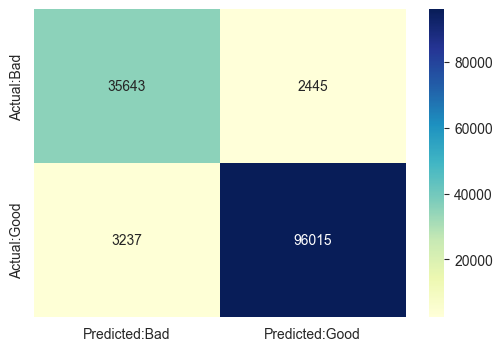

In [46]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [47]:
acc = pd.DataFrame({
    'Algorithm': ['Logistic Regression', 'Multinomial NB'],
    'Accuracy': [lr.score(testX,testY), mnb.score(testX,testY)]
})

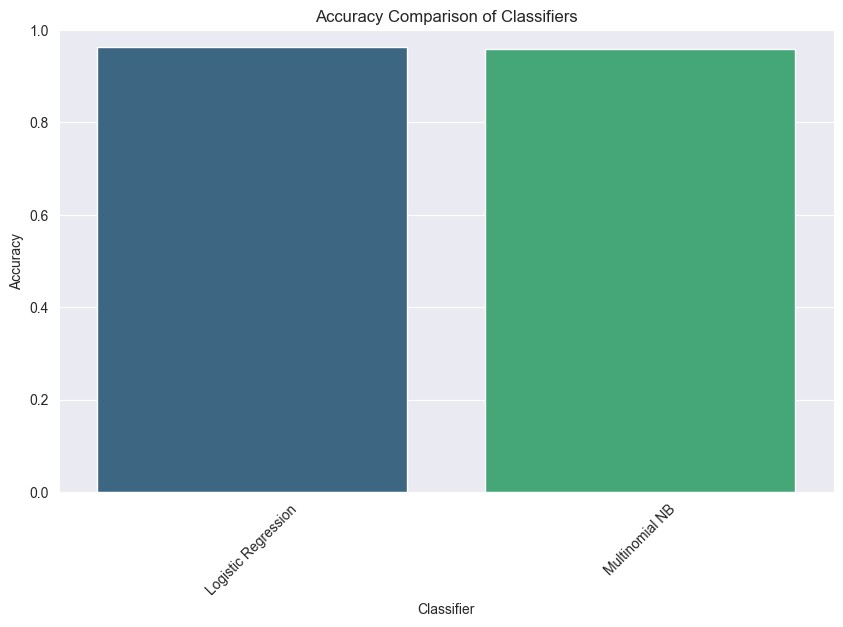

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='Accuracy', data=acc, palette='viridis')
plt.title('Accuracy Comparison of Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Limit y-axis from 0 to 1 (accuracy ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [49]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())

In [50]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [51]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [52]:
pipeline_ls.score(testX,testY) 

0.9667831658657347

Training Accuracy : 0.9806367213003347
Testing Accuracy : 0.9667831658657347

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36640
        Good       0.99      0.97      0.98    100700

    accuracy                           0.97    137340
   macro avg       0.95      0.97      0.96    137340
weighted avg       0.97      0.97      0.97    137340


CONFUSION MATRIX


<Axes: >

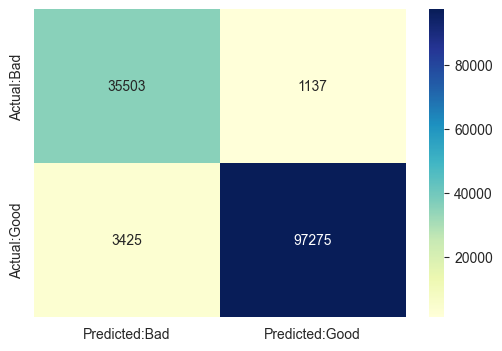

In [53]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [54]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [55]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9667831658657347


In [56]:
* Bad links => this are phishing sites
yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php
fazan-pacir.rs/temp/libraries/ipad
www.tubemoviez.exe
svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt

* Good links => this are not phishing sites
www.youtube.com/
youtube.com/watch?v=qI0TQJI3vdU
www.retailhellunderground.com/
restorevisioncenters.com/html/technology.html

SyntaxError: invalid syntax (988413086.py, line 1)

In [57]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good']
